# Timeseries - basic plot

In [1]:
# By line: RRB 2020-07-28
# Script aims to:
# - Load multiple netCDF files
# - Extract one variable: CO
# - Choose a specific location from model grid
# - Plot timeseries

### Load python packages

In [2]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import datetime
from pathlib import Path                   # System agnostic paths

### Create reusable functions

In [3]:
# Find nearest index
def find_index(array,x):
    idx = np.argmin(np.abs(array-x))
    return idx

### Load model Data:
Define the directories and file of interest for your results.

In [27]:
result_dir = Path("../../data/")
files_to_open = "CAM_chem_merra2_FCSD_1deg_QFED_monthly_*.nc"
#the netcdf files will be held in an xarray dataset named 'nc_load' and can be referenced later in the notebook
nc_load = xr.open_mfdataset(str(result_dir/files_to_open),combine='by_coords',concat_dim='time')
#to see what the netCDF file contains, just call the variable you read it into
#nc_load

### Extract the variable at the time and level and location of choice

In [28]:
#extract variable
var_sel = nc_load['CO']

#extract grid variables
lat = nc_load['lat']
lon = nc_load['lon']
time = nc_load['time']

# CAM-chem writes the month average at midnight - i.e. the start of the next month.
# Reconfigure the time variable
time2 = pd.to_datetime(time.values,format='%Y-%m-%dT%H:%M:%S')+DateOffset(months=-1,days=+14)
print("file time: ", time[0].values, "---> converted time: ", time2[0])

file time:  2018-02-01T00:00:00.000000000 ---> converted time:  2018-01-15 00:00:00


### Select and extract the location.

In [29]:
name_select = "Boulder"
lat_select = 40.0150
lon_select = 360-105.2705 # model longitude is from 0 to 360

lat_i = find_index(lat,lat_select)
lon_i = find_index(lon,lon_select)

print(name_select, " latitude: ", lat_select, "---> nearest: ", lat[lat_i].values)
print(name_select, " longitude: ", lon_select, "---> nearest: ", lon[lon_i].values)

# extract location surface value and convert to ppb
var_srf = var_sel.isel(lev=55, lat=lat_i,lon=lon_i)*1e09

Boulder  latitude:  40.015 ---> nearest:  40.0523560209424
Boulder  longitude:  254.7295 ---> nearest:  255.0


### Plot the value versus time.

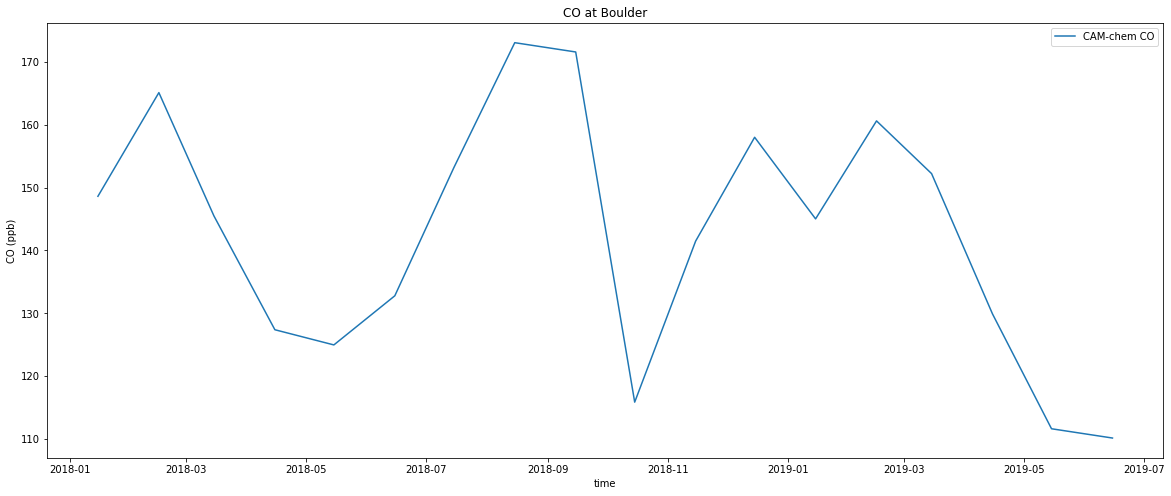

In [30]:
plt.figure(figsize=(20,8))

plt.plot(time2, var_srf, label='CAM-chem CO')

plt.title('CO at ' + name_select)        
plt.xlabel('time')
plt.ylabel('CO (ppb)')
plt.legend()

plt.show() 